## Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from tensorflow import keras

## load the mnist dataset from keras
### Handwritten digits dataset (The "Hello World!" of Neural networks)

In [3]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

## Explore the data

In [4]:
len(X_train),len(X_test)

(60000, 10000)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
print("The number is: ",y_train[10])
print("The number data in 2d array looks like this\n\n", X_train[10])

The number is:  3
The number data in 2d array looks like this

 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]


Plot the input number data using plt.matshow

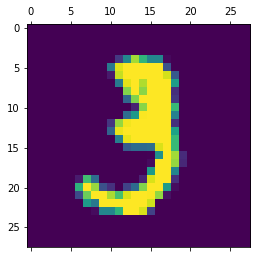

In [7]:
plt.matshow(X_train[10])

## Convert the 2d array input into a 1d array using .reshape

In [8]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train_flattened.shape

(60000, 784)

In [11]:
X_train_flattened[10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  42, 118, 219, 166, 118, 118,   6,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 103, 242, 254, 254, 254, 254,
       254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 25

## Let's create a simple Neural Network

In [12]:
# Building the Neural Nets, declare the # of input neurons and output neurons
# In case of adding a hidden layer, add more as keras.layers.Dense() inside the Sequential
# Adding a hidden layer increases the accuracy but also increases computational time
# Could also flatten the data here as keras.layers.Flatten(input_shape=(28*28))
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

# model.compile is for entering arguments for the model training

model.compile(
    optimizer='adam', # allows for training efficienctly
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 9.9308 - accuracy: 0.8393
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 6.1183 - accuracy: 0.8781
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.7052 - accuracy: 0.8830
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3906 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3534 - accuracy: 0.8872


Accuracy for this model is 88.72%

## Scaling technique tends to improve the accuracy

In [13]:
X_train_flattened_scaled = X_train_flattened / 255

In [14]:
model.fit(X_train_flattened_scaled,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3119 - accuracy: 0.8198
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9058 - accuracy: 0.8677
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6208 - accuracy: 0.8836
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4526 - accuracy: 0.8968
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3607 - accuracy: 0.9067


Accuracy for this model is 90.67%

In [15]:
model_preds = model.predict(X_train_flattened_scaled)
model_preds

array([[1.98477209e-01, 7.82752037e-03, 1.93993539e-01, ...,
        2.94194102e-01, 1.96927398e-01, 8.64559412e-02],
       [9.99599516e-01, 7.67953752e-05, 1.37195498e-01, ...,
        2.17506588e-02, 1.92590594e-01, 5.83931506e-02],
       [3.42543125e-02, 3.11228633e-03, 3.63534451e-01, ...,
        2.23344654e-01, 1.21743649e-01, 5.77972054e-01],
       ...,
       [7.92271197e-02, 2.79333591e-02, 3.10653448e-03, ...,
        1.38247907e-02, 6.84558511e-01, 1.13498926e-01],
       [2.52075464e-01, 1.88255310e-03, 2.11582690e-01, ...,
        3.83585691e-04, 2.08653510e-02, 1.06217563e-02],
       [4.51908886e-01, 3.77050042e-03, 1.21079445e-01, ...,
        6.23291135e-02, 8.63248348e-01, 4.62551832e-01]], dtype=float32)

## Let's look at the predictions

In [16]:
model_prediction = model.predict(X_test_flattened)

In [17]:
model_prediction[46]

array([0.0000000e+00, 1.0000000e+00, 5.4709126e-08, 1.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00], dtype=float32)

Now we need the know the max value out of these 10 scores

In [18]:
np.argmax(model_prediction[46])

1

Now let's verify this with the y_test

In [19]:
y_test[46]

1

### Let's convert the predictions into their digits

In [20]:
model_preds_final = [np.argmax(i) for i in model_prediction]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=model_preds_final)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    0,    1,    0,    0,    1,    0,    1,    0],
       [   0, 1115,   11,    4,    1,    2,    2,    0,    0,    0],
       [ 138,   67,  807,    3,   11,    0,    3,    1,    2,    0],
       [ 130,    3,  335,  536,    1,    1,    0,    3,    1,    0],
       [  36,    1,   61,   54,  820,    0,    4,    0,    6,    0],
       [ 214,    6,   47,  288,   42,  277,    4,    1,   13,    0],
       [ 183,    3,  521,    8,   29,   41,  173,    0,    0,    0],
       [  54,   18,  132,  329,   80,    9,    0,  402,    4,    0],
       [  46,   12,  183,  233,   37,  102,   18,   12,  331,    0],
       [  32,    7,   41,  153,  637,    9,    0,   62,   64,    4]],
      dtype=int32)>

Text(69.0, 0.5, 'Predicted')

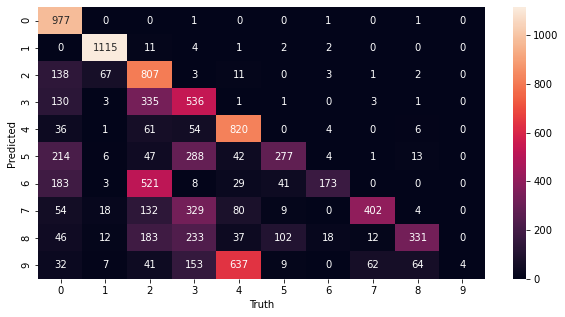

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Truth")
plt.ylabel("Predicted")